In [1]:
%matplotlib notebook

import struct
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class srtmParser(object):
 
    def parseFile(self,filename):
        # read 1,442,401 (1201x1201) high-endian
        # signed 16-bit words into self.z
        fi=open(filename,"rb")
        contents=fi.read()
        fi.close()
        self.z=struct.unpack(">1442401H", contents)
 
    def writeCSV(self,filename):
        if self.z :
            fo=open(filename,"w")
            for row in range(0,1201):
                offset=row*1201
                thisrow=self.z[offset:offset+1201]
                rowdump = ",".join([str(z) for z in thisrow])
                fo.write("%s\n" % rowdump)
            fo.close()
        else:
            return None

In [3]:
srtmparser = srtmParser()
srtmparser.parseFile(r".\data\goldenElevData\N39W106.hgt") 
srtmparser.writeCSV(r".\data\goldenElevData\N39W106.csv")

In [6]:
my_data = np.arctan((genfromtxt('./data/goldenElevData/N39W106.csv', delimiter=',')))
#my_data = np.arctan((genfromtxt('./data/goldenElevData/N39W106.csv', delimiter=',')))

<IPython.core.display.Javascript object>


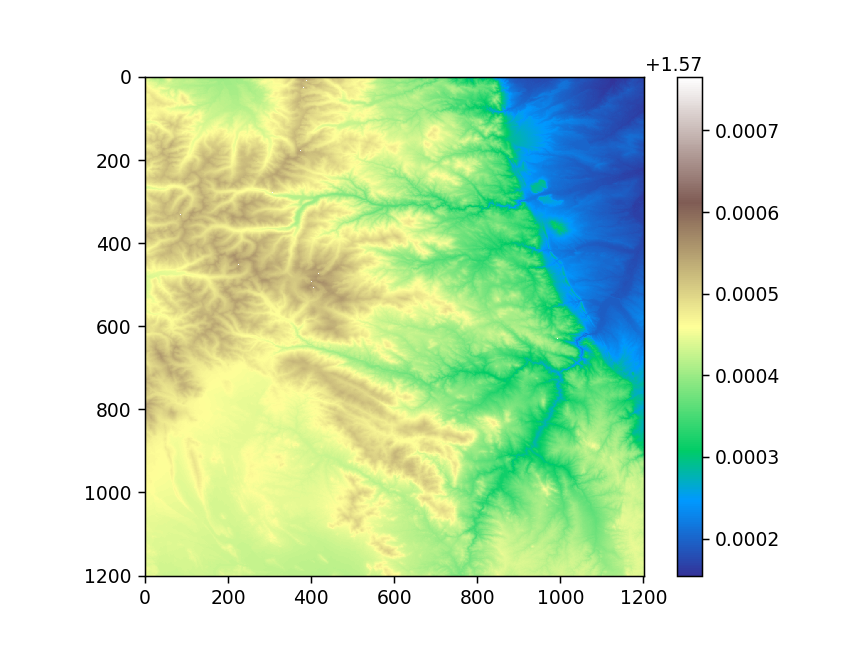

In [7]:
imgplot = plt.imshow(my_data)
imgplot.set_cmap('terrain')
plt.colorbar()

In [14]:
y = my_data[200:400]
x = y.T[800:1000].T

print(np.shape(y))
print(np.shape(x))


(200, 1201)
(200, 200)


<IPython.core.display.Javascript object>


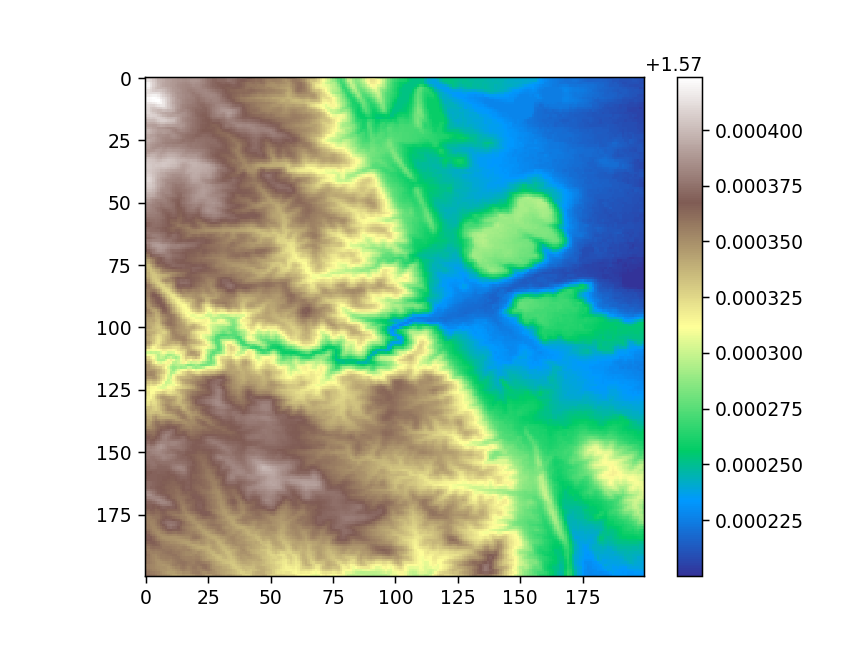

In [15]:
imgplot = plt.imshow(x)
imgplot.set_cmap('terrain')
plt.colorbar()

In [16]:
fx = np.array(np.ndarray.flatten(x)).reshape((40000,1))
fx = np.tan(fx)

In [18]:
Domain = []
for i in range(0,200):
    for j in range(0,200):
        Domain.append([(i,j)])

z = np.array(Domain).reshape((40000,2))
Surface = np.concatenate((z,fx), axis=1)

np.savetxt('test.csv', Surface, delimiter=',')

<IPython.core.display.Javascript object>


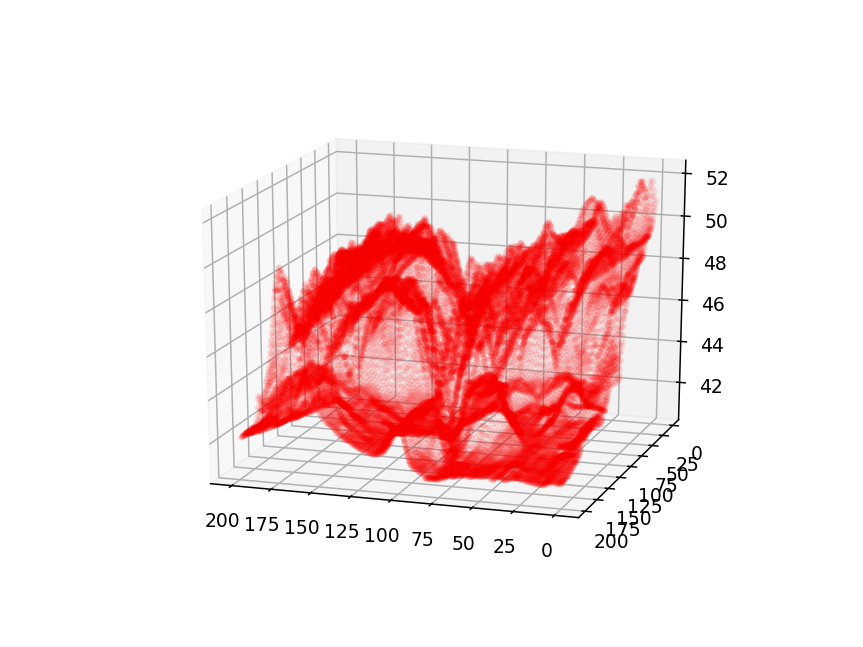

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d',navigate = True)

X = Surface[0:,0]
Y = Surface[0:,1]
Z = np.sqrt(Surface[0:,2])

ax1.scatter(X,Y,Z,alpha = .1, linewidths = .01, c = 'r', s=10, marker = 'o')
